In [20]:
import csv
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def clean_data(picks):
    cleansed_picks = []
    for pick in picks:
        items = []
        items.append(pick[0].strip()) # absolute pick number
        items.append(pick[1].strip()) # round
        items.append(pick[2].strip()) # pick in round
        player_data = pick[-5:]
        items.append(player_data[1].strip() + " " + player_data[0].strip()) # first + last name
        items.append(player_data[2].strip()) # position
        items.append(player_data[3].strip()) # team
        items.append(player_data[4].strip()) # bye
        cleansed_picks.append(items)
    return cleansed_picks

# Read in all draft csvs
files = []
for file in os.listdir("new-drafts"):
    if file.endswith(".csv"):
        files.append(os.path.join("new-drafts", file))

print("Found " + str(len(files)) + " drafts to analyze")

# Create list of all drafts, 1 draft per file
drafts = []
for file in files:
    picks = []
    with open(file, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if (row[0] == "Overall Pick"):
                continue
            picks.append(row)
    cleansed_picks = clean_data(picks)
    drafts.append(cleansed_picks)

print("Finished parsing all drafts")

Found 38 drafts to analyze
Finished parsing all drafts


In [21]:
# Find adps for every player
player_adp = {}

# Also store team and position for quick lookups
player_team = {}
player_pos = {}

for draft in drafts:
    for pick in draft:
        #if (pick[4] == 'TE'):
        player = pick[3]
        player_team[player] = pick[5]
        player_pos[player] = pick[4]

        # Keep a list of spots player has been picked in the dictionary
        if player in player_adp:
            player_pick_nums = player_adp[player]
            player_pick_nums.append(pick[0])
        else:
            player_pick_nums = [pick[0]]
            player_adp[player] = player_pick_nums

In [23]:
df = pd.DataFrame()
df['Player'] = []
df['Pick'] = []
df['Team'] = []
df['Position'] = []

# Key/Value is adp : player
players_sorted_adp = {}

count = 40
skip = 0
for player in player_adp.keys():
    count = count - 1
    skip = skip + 1
    if skip < 0:
        continue
    if count < 0:
        break
    player_picks = player_adp[player]
    player_picks = [int(x) for x in player_picks]
    avg_adp = sum(player_picks)/len(player_picks)
    if avg_adp in players_sorted_adp:
        avg_adp = avg_adp + 0.0001
    players_sorted_adp[avg_adp] = player
        

# Sort all adps, so keys are in order from lowest to highest adps
all_adps_sorted = sorted(players_sorted_adp.keys())

rank = 1

# Add player and all of their picked spots to a pandas dataframe
# Also print the position, team, and ranked adp
for adp in all_adps_sorted:
    player = players_sorted_adp[adp]
    player_picks = player_adp[player]
    
    team = player_team[player]
    pos = player_pos[player]
    
    size = len(player)
    string_player = player
    string_player += ' ' * (25 - size)
    
    print(str(rank) + ".\t" + string_player + "" + pos + "\t" + team + "\t" + str(round(adp, 4)))
    rank = rank + 1
    player_picks = [int(x) for x in player_picks]
    for pick in player_picks:
        df = df.append({'Player' : player, 'Pick' : pick}, ignore_index = True)

1.	Christian McCaffrey      RB	CAR	1.0526
2.	Saquon Barkley           RB	NYG	2.1053
3.	Ezekiel Elliott          RB	DAL	3.0
4.	Alvin Kamara             RB	NO	4.3421
5.	Michael Thomas           WR	NO	5.7632
6.	Dalvin Cook              RB	MIN	5.8947
7.	Clyde Edwards-Helaire    RB	KC	7.5263
8.	Derrick Henry            RB	TEN	8.5263
9.	Travis Kelce             TE	KC	8.7895
10.	Miles Sanders            RB	PHI	10.6579
11.	Joe Mixon                RB	CIN	12.4737
12.	Davante Adams            WR	GB	13.3684
13.	George Kittle            TE	SF	13.4737
14.	Kenyan Drake             RB	ARI	13.9211
15.	Josh Jacobs              RB	LV	14.2105
16.	Tyreek Hill              WR	KC	15.6053
17.	Austin Ekeler            RB	LAC	17.3421
18.	Julio Jones              WR	ATL	17.7368
19.	Nick Chubb               RB	CLE	19.3158
20.	Aaron Jones              RB	GB	19.8684
21.	DeAndre Hopkins          WR	ARI	20.2632
22.	Chris Godwin             WR	TB	21.8421
23.	James Conner             RB	PIT	25.4474
24.	Lamar Jackson  

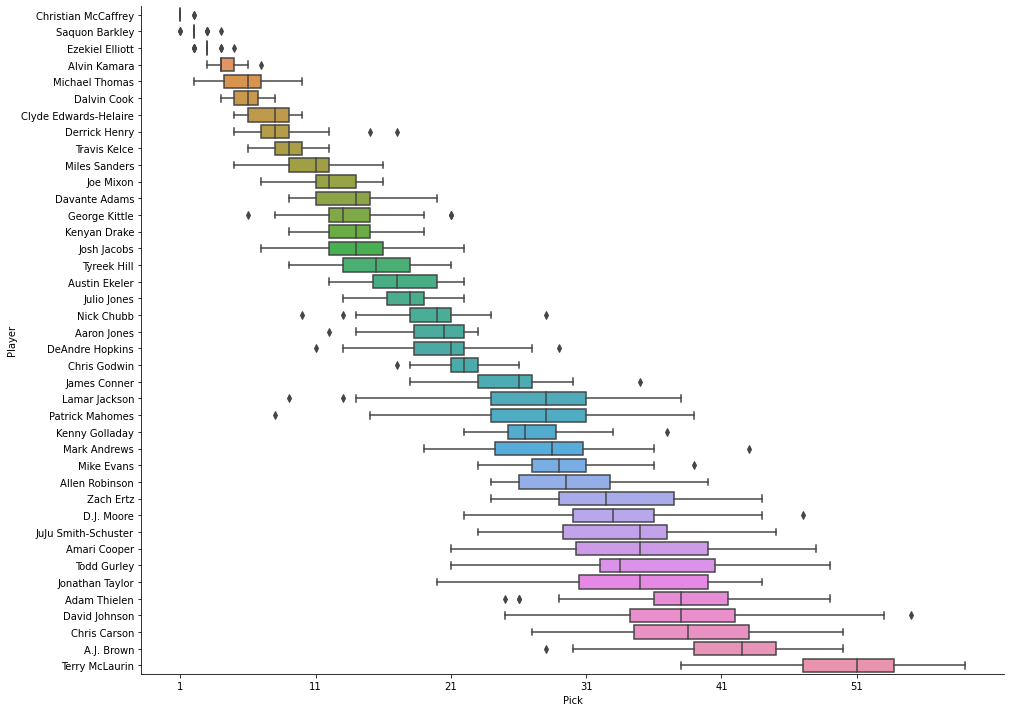

In [24]:
boxplot = sns.catplot(x="Pick", y="Player", kind="box", data=df, orient='h', height=10, aspect=11.7/8.27);
boxplot.set(xticks=[i for i in range(int(min(df['Pick'])), int(max(df['Pick'])) + 1, 10)])

In [32]:
# Single player analysis

players_to_compare = [ "" ]

player_comparison_df = pd.DataFrame()
player_comparison_df['Player'] = []
player_comparison_df['Pick'] = []

for adp in all_adps_sorted:
    player = players_sorted_adp[adp]
    if player in players_to_compare:
        player_picks = player_adp[player]
        print(player + " " + str(adp))
        player_picks = [int(x) for x in player_picks]
        for pick in player_picks:
            player_comparison_df = player_comparison_df.append({'Player' : player, 'Pick' : pick}, ignore_index = True)

David Montgomery 53.78125


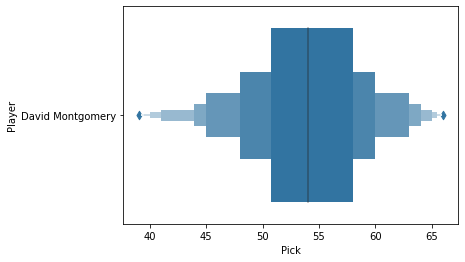

In [33]:
boxenplot = sns.boxenplot(x="Pick", y="Player", data=player_comparison_df, orient='h')

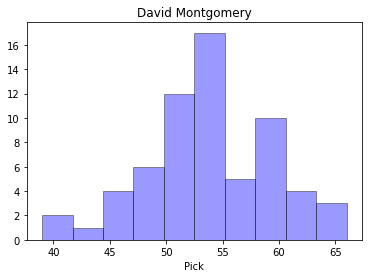

In [34]:
for playa in players_to_compare:
    player_data = player_comparison_df.loc[player_comparison_df['Player'] == playa]
    plt.figure()
    plt.title(playa)
    sns.distplot(player_data["Pick"], color='blue', bins=10, kde=False, hist_kws=dict(edgecolor="k", linewidth=1))